In [25]:
import pandas as pd
churn_data = pd.read_csv('data\churn.csv')
#churn_data.head()



<>:2: SyntaxWarning:

invalid escape sequence '\c'

<>:2: SyntaxWarning:

invalid escape sequence '\c'

C:\Users\lesiv\AppData\Local\Temp\ipykernel_3080\2752571879.py:2: SyntaxWarning:

invalid escape sequence '\c'



## 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

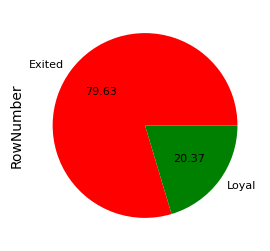

In [26]:
leakage = churn_data.groupby(by='Exited')['RowNumber'].count()
leakage
fig1 = leakage.plot.pie(
    labels=["Exited", "Loyal"],
    colors=["r", "g"],
    autopct="%.2f",
    fontsize=8,
    figsize=(3, 3),
)

# 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
mask1 = churn_data['Balance'] > 2500 # 
fig2 = px.histogram(
    data_frame=churn_data[mask1],
    x = 'Balance',
    title='$2500 users balance split',
    labels={'Balance': 'Balance, USD', 'count': 'Customers #'},
    nbins=60
)
fig2.update_layout(yaxis_title="Customers #")
display(fig2)

## 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd


churn_data = pd.read_csv('data\churn.csv')

fig3 = px.histogram(churn_data,
                   x='Balance',
                   nbins=20,
                   title='Распределение баланса клиентов по оттоку',
                   color="Exited",
                   histnorm="percent",
                   color_discrete_sequence=['red', 'blue'],
                   opacity=0.7)
fig3.update_xaxes(title_text='Баланс')
fig3.update_yaxes(title_text='Количество клиентов')
fig3.show()

<>:7: SyntaxWarning:

invalid escape sequence '\c'

<>:7: SyntaxWarning:

invalid escape sequence '\c'

C:\Users\lesiv\AppData\Local\Temp\ipykernel_3080\612194248.py:7: SyntaxWarning:

invalid escape sequence '\c'



In [44]:
churn_data = pd.read_csv('data\churn.csv')

fig3 = px.histogram(churn_data,
                   x='Balance',
                   nbins=20,
                   title='Распределение баланса клиентов по оттоку',
                   color="Exited",
                   histnorm="percent",
                   color_discrete_sequence=['red', 'blue'],
                   opacity=0.7)
fig3.update_xaxes(title_text='Баланс')
fig3.update_yaxes(title_text='Количество клиентов')
fig3.show()


<>:1: SyntaxWarning:

invalid escape sequence '\c'

<>:1: SyntaxWarning:

invalid escape sequence '\c'

C:\Users\lesiv\AppData\Local\Temp\ipykernel_3080\3426926813.py:1: SyntaxWarning:

invalid escape sequence '\c'



<function matplotlib.pyplot.show(close=None, block=None)>

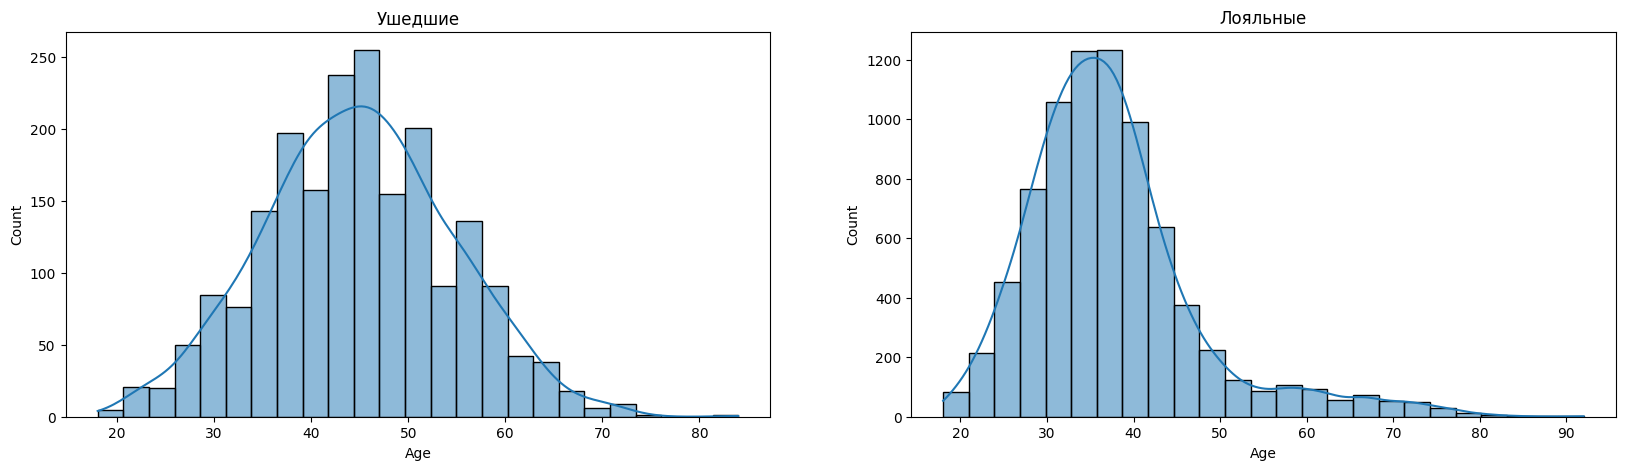

In [92]:
exited=churn_data[churn_data['Exited']>0]
#exited.head()
nonexited=churn_data[churn_data['Exited']<1]

fig, axes = plt.subplots(1, 2, figsize = (20, 5))

sns.histplot(
    data=exited,
    x='Age',
    bins=25,
    kde=True,
    ax=axes[0],
);
axes[0].set_title('Ушедшие')
sns.histplot(
    data=nonexited,
    x='Age',
    bins=25,
    kde=True,
    ax=axes[1]
);
axes[1].set_title('Лояльные')
plt.show